In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score, train_test_split

In [4]:
data = "data"

In [42]:
df_meas = pd.read_csv(data + "/IMPROVE_2015_measures_cs433.csv")
df_spec = pd.read_csv(data + "/IMPROVE_2015_raw_spectra_cs433.csv")
df_split = pd.read_csv(data + "/IMPROVE_2015_train_test_split_cs433.csv")
df_derive = pd.read_csv(data + "/IMPROVE_2015_2nd-derivative_spectra_cs433.csv")

### Data Exploration

In [43]:
df_meas = df_meas.set_index("site")

In [44]:
df_OC = pd.DataFrame(df_meas[["OCf:Value","OCf:Unc"]]) #df_meas.loc[df_meas.flag == "NM",["OCf:Value","OCf:Unc"]] 

### Data Processing

In [45]:
df_spec = df_spec.T

pd_merge = df_OC.merge(df_spec, right_index=True, left_index=True)

In [46]:
df_split = df_split.set_index("site", drop=True).drop(["Unnamed: 0"], axis=1)

In [47]:
pd_merge_again = pd_merge.merge(df_split, right_index=True, left_index=True)

set_train = pd_merge_again[pd_merge_again["usage"] == "calibration"]
set_test = pd_merge_again[pd_merge_again["usage"] == "test"]

In [48]:
df_OCU_tr = set_train["OCf:Unc"]
df_OCU_te = set_test["OCf:Unc"]

In [27]:
y_tr = set_train["OCf:Value"]
y_te = set_test["OCf:Value"]
x_tr = set_train.drop(["OCf:Value","OCf:Unc","usage"], axis=1)
x_te = set_test.drop(["OCf:Value","OCf:Unc","usage"], axis=1)

### LinearRegression

In [ ]:
lr = LinearRegression()

cross_val_score(lr, x_tr, y_tr, cv=10)

lr.fit(x_tr,y_tr)

In [29]:
y_pred_tr = lr.predict(x_tr)
y_pred_te = lr.predict(x_te)

Text(0,0.5,'Predicted y')

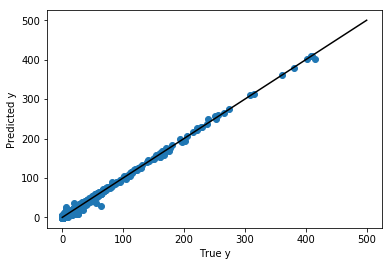

In [30]:
plt.scatter(y_tr,y_pred_tr)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")

In [31]:
r2_score(y_tr,y_pred_tr)

0.9939504806681574

In [32]:
bias_tr = (y_tr - y_pred_tr) / df_OCU_tr
#bias_te = (y_te - y_pred_te) / df_OCU_te

In [33]:
SNR_tr = y_tr / df_OCU_tr
#SNR_te = y_te / df_OCU_te

Text(0,0.5,'bias')

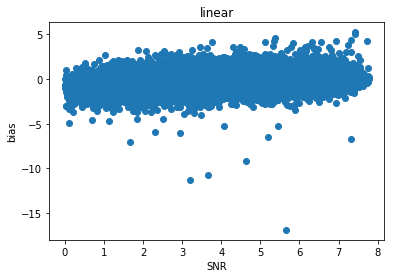

In [34]:
plt.scatter(SNR_tr,bias_tr)
plt.title("linear")
plt.xlabel("SNR")
plt.ylabel("bias")

### Ridge regression

In [35]:
ridge = Ridge()

In [36]:
cross_val_score(ridge,x_tr,y_tr, cv=10)

array([0.95377443, 0.96659408, 0.98123803, 0.9557097 , 0.96215155,
       0.97658692, 0.97252635, 0.9814716 , 0.9707717 , 0.96947386])

In [37]:
ridge.fit(x_tr,y_tr)
y_pred_tr_ridge = ridge.predict(x_tr)
#y_pred_te_ridge = ridge.predict(x_te)

Text(0,0.5,'Predicted y')

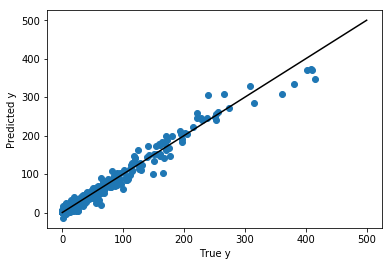

In [38]:
plt.scatter(y_tr,y_pred_tr_ridge)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")


In [39]:
r2_score(y_tr,y_pred_tr_ridge)

0.9754435219744605

Text(0,0.5,'bias')

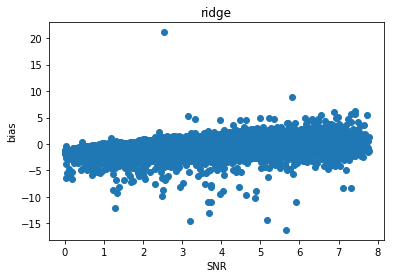

In [40]:
bias_tr_ridge = (y_tr - y_pred_tr_ridge) / df_OCU_tr

plt.scatter(SNR_tr,bias_tr_ridge)
plt.title("ridge")
plt.xlabel("SNR")
plt.ylabel("bias")

### Neural Network

In [41]:
nn = MLPRegressor()

In [42]:
nn.fit(x_tr,y_tr)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [43]:
y_pred_tr_nn = nn.predict(x_tr)

Text(0,0.5,'Predicted y')

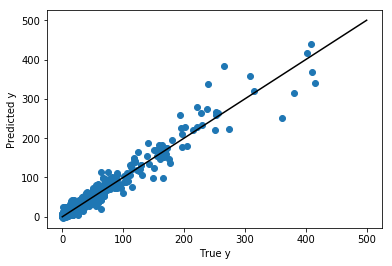

In [44]:
plt.scatter(y_tr,y_pred_tr_nn)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")

In [45]:
r2_score(y_tr,y_pred_tr_nn)

0.9455604454026282

Text(0,0.5,'bias')

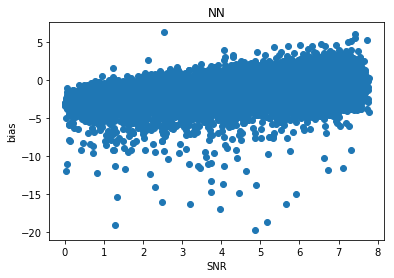

In [46]:
bias_tr_nn = (y_tr - y_pred_tr_nn) / df_OCU_tr

plt.scatter(SNR_tr,bias_tr_nn)
plt.title("NN")
plt.xlabel("SNR")
plt.ylabel("bias")

# 2nd derivative

In [49]:
df_derive = df_derive.T

In [50]:
pd_der_merge = df_OC.merge(df_derive, right_index=True, left_index=True)

In [49]:
df_split.head(9)

,usage
site,
CRLA1_04_21_2015_NM_0_csv,calibration
TONT1_05_09_2015_NM_0_csv,calibration
BADL1_11_26_2015_NM_0_csv,calibration
BRID1_10_27_2015_NM_0_csv,calibration
SEQU1_04_03_2015_NM_0_csv,calibration
PINN1_08_04_2015_NM_QC_0_csv,calibration
BRIS1_12_17_2015_NM_0_csv,calibration
BRCA1_04_15_2015_NM_0_csv,calibration
ORPI1_09_03_2015_FB_0_csv,calibration


In [51]:
pd_der_again = pd_der_merge.merge(df_split, right_index=True, left_index=True)

In [51]:
set_train_der = pd_der_again[pd_der_again["usage"] == "calibration"]

In [52]:
set_test_der = pd_der_again[pd_der_again["usage"] == "test"]

In [53]:
y_tr_der = set_train_der["OCf:Value"]
y_te_der = set_test_der["OCf:Value"]
x_tr_der = set_train_der.drop(["OCf:Value","OCf:Unc","usage"], axis=1)
x_te_der = set_test_der.drop(["OCf:Value","OCf:Unc","usage"], axis=1)

In [54]:
lr.fit(x_tr_der,y_tr_der)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
der_predict_tr = lr.predict(x_tr_der)

Text(0,0.5,'Predicted y')

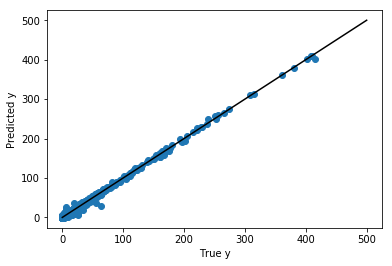

In [56]:
plt.scatter(y_tr,der_predict_tr)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")

In [57]:
r2_score(y_tr,der_predict_tr)

0.9938818952842716

In [58]:
x_tr_der[x_tr_der.index.contains("_NM_")]

CRLA1_04_21_2015_NM_0_csv      -1.664240e-07
TONT1_05_09_2015_NM_0_csv      -2.567684e-07
BADL1_11_26_2015_NM_0_csv      -3.991203e-07
BRID1_10_27_2015_NM_0_csv       4.606378e-08
SEQU1_04_03_2015_NM_0_csv       9.093881e-08
PINN1_08_04_2015_NM_QC_0_csv   -6.154715e-07
BRIS1_12_17_2015_NM_0_csv      -3.292817e-07
BRCA1_04_15_2015_NM_0_csv       9.093881e-08
WHIT1_12_14_2015_NM_0_csv      -8.321198e-09
DOME1_08_31_2015_NM_0_csv       1.444322e-07
GLAC1_04_09_2015_NM_0_csv       3.661327e-07
LOST1_03_07_2015_NM_0_csv      -3.209605e-07
MAKA2_03_31_2015_NM_0_csv      -4.763886e-07
ELLI1_08_13_2015_NM_2_0_csv    -2.169455e-08
BADL1_10_09_2015_NM_0_csv      -1.845523e-07
MOZI1_04_15_2015_NM_0_csv       9.331629e-08
IKBA1_01_06_2015_NM_0_csv      -4.332967e-07
SHEN1_02_08_2015_NM_0_csv      -1.393801e-07
PHOE5_11_23_2015_NM_0_csv      -2.835151e-07
MORA1_04_21_2015_NM_0_csv      -1.227377e-07
BYIS1_08_07_2015_NM_0_csv      -3.269042e-07
SIPS1_08_01_2015_NM_0_csv      -4.009034e-07
NOCA1_10_0

## Data processing on 2de derivative

In [52]:
X = pd_der_again.drop('usage', axis=1)
y_both = pd_der_again[['OCf:Value', 'OCf:Unc']]
y_value = pd_der_again['OCf:Value']

 ...]

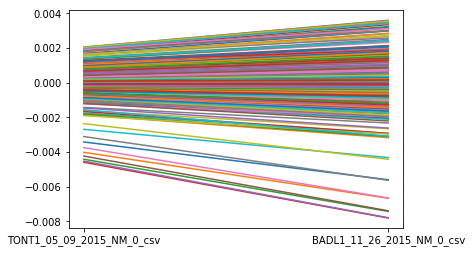